In [23]:
# IMPORT PACKAGES
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [2]:
# LOAD TRAINING DATA
train_images = np.load('lego-simple-train-images.npy')
train_labels = np.load('lego-simple-train-labels.npy')

In [3]:
# LOAD TEST DATA
test_images = np.load('lego-simple-test-images.npy')
test_labels = np.load('lego-simple-test-labels.npy')

In [7]:
class_names = ['2x3 Brick', '2x2 Brick', '1x3 Brick', '2x1 Brick', '1x1 Brick', '2x2 Macaroni', '2x2 Curved End', 'Cog 16 Tooth', '1x2 Handles', '1x2 Grill']

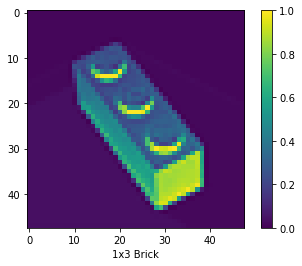

In [10]:
# VISUALIZE THE DATA
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.xlabel(class_names[train_labels[0]])
plt.show()

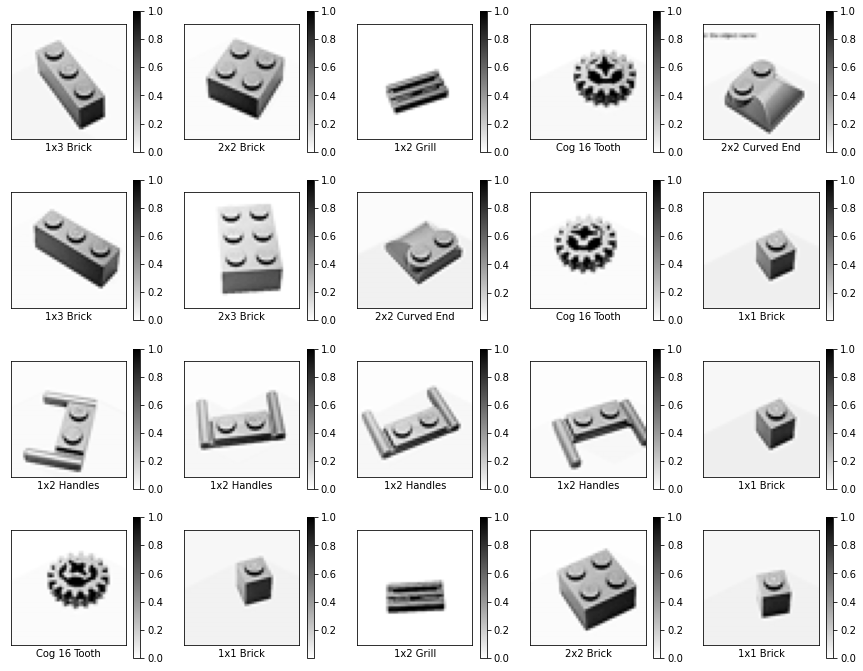

In [20]:
# VISUALIZE THE DATA
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.colorbar()
plt.show()

In [25]:
# BUILD THE MODEL
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48,48)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)   
])

# COMPILE
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
# FIT THE MODEL ON TRAIN DATASET
model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
451/451 [==============================] - 0s 219us/step - loss: 0.7622 - accuracy: 0.8559
Epoch 2/4
451/451 [==============================] - 0s 215us/step - loss: 0.4197 - accuracy: 0.9157
Epoch 3/4
451/451 [==============================] - 0s 203us/step - loss: 0.2946 - accuracy: 0.9379
Epoch 4/4
451/451 [==============================] - 0s 190us/step - loss: 0.1762 - accuracy: 0.9778


In [28]:
# EVALUATE THE MODEL ON TEST DATA
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

150/150 [==============================] - 0s 153us/step
0.22669099211692811
0.9866666793823242


In [37]:
# MAKE PREDICTIONS
test_image_num = 10
img = test_images[test_image_num]

img = (np.expand_dims(img,0))
pred_single = model.predict(img)
pred_single = np.argmax(pred_single[0])
print("Predicted class is {} while actual class is {}".format(class_names[pred_single], class_names[test_labels[test_image_num]]))



Predicted class is 1x2 Grill while actual class is 1x2 Grill


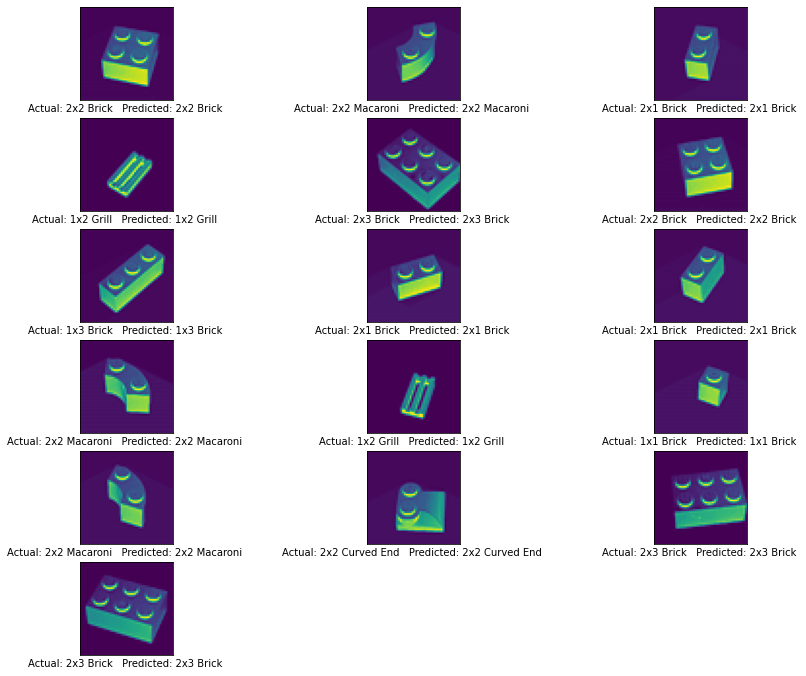

In [46]:
# MAKE BATCH PREDICTIONS
cols = 8
rows = 2
plt.figure(figsize=(15,16))
for i in range(rows*cols):
    plt.subplot(cols, 3*rows, 2*i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    img = test_images[i]
    img = np.expand_dims(img,0)
    
    plt.xlabel("Actual: {}   Predicted: {} ".format(class_names[test_labels[i]], class_names[np.argmax(model.predict(img)[0])]))
    
    plt.subplot(cols, 3*rows, 2*i + 2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow
plt.show()